In [1]:
import wrangle as w
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [2]:
df = w.clean_wine()
df.head().T


,0,1,2,3,4
fixed_acidity,7.4,7.8,7.8,11.2,7.4
volatile_acidity,0.7,0.88,0.76,0.28,0.7
citric_acid,0.0,0.0,0.04,0.56,0.0
residual_sugar,1.9,2.6,2.3,1.9,1.9
chlorides,0.076,0.098,0.092,0.075,0.076
free_sulfur_dioxide,11.0,25.0,15.0,17.0,11.0
total_sulfur_dioxide,34.0,67.0,54.0,60.0,34.0
density,0.9978,0.9968,0.997,0.998,0.9978
ph,3.51,3.2,3.26,3.16,3.51
sulphates,0.56,0.68,0.65,0.58,0.56


In [3]:
df = w.clean_wine()

In [4]:
train, val, test = w.train_val_test(df)


In [5]:

train, val, test = w.train_val_test(df)



In [6]:
train.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'quality_bins',
 'alcohol_bins',
 'total_sulfur_ratio',
 'acidity_level',
 'sugar_alcohol_ratio',
 'chlorides_ph_ratio',
 'density_ph_ratio',
 'sulfur_dioxide_level',
 'sulfates_chlorides_ratio',
 'ph_bins',
 'total_acid',
 'sulfur_dioxide_chlorides_ratio',
 'residual_sugar_ph_ratio',
 'acid_ratio',
 'alcohol_ph_ratio',
 'chlorides_density_ratio',
 'total_sulfur_residual_sugar_ratio',
 'sulfur_dioxide_percentage',
 'ph_chlorides_ratio',
 'alcohol_sugar_ratio',
 'density_sulfates_ratio',
 'chlorides_sulfates_ratio',
 'residual_sugar_percentage',
 'alcohol_chlorides_ratio',
 'density_sulfur_dioxide_ratio',
 'ph_sulfur_dioxide_ratio',
 'sulfur_dioxide_sugar_ratio']

In [7]:
def scale_data(train, val, test, scaler):
    """
    Scales the numerical columns of the data using the specified scaler.

    Args:
        train (pd.DataFrame): Training data.
        val (pd.DataFrame): Validation data.
        test (pd.DataFrame): Test data.
        scaler (sklearn.preprocessing.Scaler): The scaler to use for data scaling.

    Returns:
        tuple: A tuple containing scaled versions of train, validation, and test DataFrames.
    """
    # Make copies for scaling
    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()

    columns_to_scale = ['fixed_acidity',
                         'volatile_acidity',
                         'citric_acid',
                         'residual_sugar',
                         'chlorides',
                         'free_sulfur_dioxide',
                         'total_sulfur_dioxide',
                         'density',
                         'ph',
                         'sulphates',
                         'alcohol',
                         'quality',
                         'total_sulfur_ratio',
                         'acidity_level',
                         'sugar_alcohol_ratio',
                         'chlorides_ph_ratio',
                         'density_ph_ratio',
                         'sulfur_dioxide_level',
                         'sulfates_chlorides_ratio',
                         'total_acid',
                         'sulfur_dioxide_chlorides_ratio',
                         'residual_sugar_ph_ratio',
                         'acid_ratio',
                         'alcohol_ph_ratio',
                         'chlorides_density_ratio',
                         'total_sulfur_residual_sugar_ratio',
                         'sulfur_dioxide_percentage',
                         'ph_chlorides_ratio',
                         'alcohol_sugar_ratio',
                         'density_sulfates_ratio',
                         'chlorides_sulfates_ratio',
                         'residual_sugar_percentage',
                         'alcohol_chlorides_ratio',
                         'density_sulfur_dioxide_ratio',
                         'ph_sulfur_dioxide_ratio',
                         'sulfur_dioxide_sugar_ratio',
                       ]
    
    # Fit the scaler on the training data for all of the columns
    scaler.fit(train[columns_to_scale])
    
    # Transform the data for each split
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    val_scaled[columns_to_scale] = scaler.transform(val[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])

    scaled_col = [train_scaled, val_scaled, test_scaled]
    
    return train_scaled, val_scaled, test_scaled

In [8]:
mms = MinMaxScaler()
train_scaled, val_scaled, test_scaled = scale_data(train, val, test, mms)

In [9]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,sulfur_dioxide_percentage,ph_chlorides_ratio,alcohol_sugar_ratio,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,...,0.173900,0.075112,0.213785,0.438989,0.291341,0.020075,0.062414,0.035256,0.029406,0.230453
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,...,0.295627,0.149447,0.025710,0.373711,0.149847,0.158298,0.105107,0.034612,0.036939,0.031590
1359,0.661017,0.263333,0.325203,0.012270,0.136213,0.034364,0.065089,0.191440,0.259843,0.244318,...,0.233785,0.080423,0.399618,0.257375,0.196061,0.056713,0.063903,0.200384,0.196294,0.092593
1230,0.330508,0.066667,0.276423,0.032209,0.094684,0.096220,0.153846,0.146327,0.496063,0.318182,...,0.287893,0.128921,0.239727,0.192760,0.104648,0.052376,0.110064,0.087319,0.095760,0.099909
4751,0.322034,0.113333,1.000000,0.061350,0.043189,0.343643,0.852071,0.059186,0.228346,0.119318,...,0.183971,0.228332,0.152669,0.449440,0.099333,0.013506,0.241747,0.002898,0.002525,0.309447


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def find_clusters(train_scaled, variable1, variable2, variable3):
    '''
    Inputs:
    train - the dataset
    variable1, variable2, variable3 - feature names as strings in search of potential clusters
    Outputs:
    Plot with clusters & modified train dataframe with an additional 'cluster' column.
    '''
    
    # create a subset of train with the specified variables
    X = train_scaled[[variable1, variable2, variable3]]
    
    # initiate and fit kmeans
    kmeans = KMeans(n_clusters=3, random_state=42) 
    kmeans.fit(X)
    train_scaled['cluster'] = kmeans.predict(X)
    
    # Create centroids dataframe for potential use or display
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[variable1, variable2, variable3])
    
    # Rename cluster labels for clarity in visualization
    train_scaled['cluster'] = 'cluster_' + train_scaled.cluster.astype(str)
    
    #Plot the actual distribution of quality next to generated clusters
    fig, axes = plt.subplots(1, 2, figsize=(16, 9))
    
    sns.scatterplot(ax=axes[0], x=variable1, y=variable2, hue='quality', palette='colorblind', data=train_scaled)
    axes[0].set_title("Actual Distribution of Quality Bins")
    
    sns.scatterplot(ax=axes[1], x=variable1, y=variable2, hue='cluster', palette='colorblind', data=train_scaled)
    axes[1].set_title("Clusters Generated by KMeans")
    
    plt.show()
    
    return train_scaled


# Cluster 1: 'fixed_acidity', 'residual_sugar', 'density'

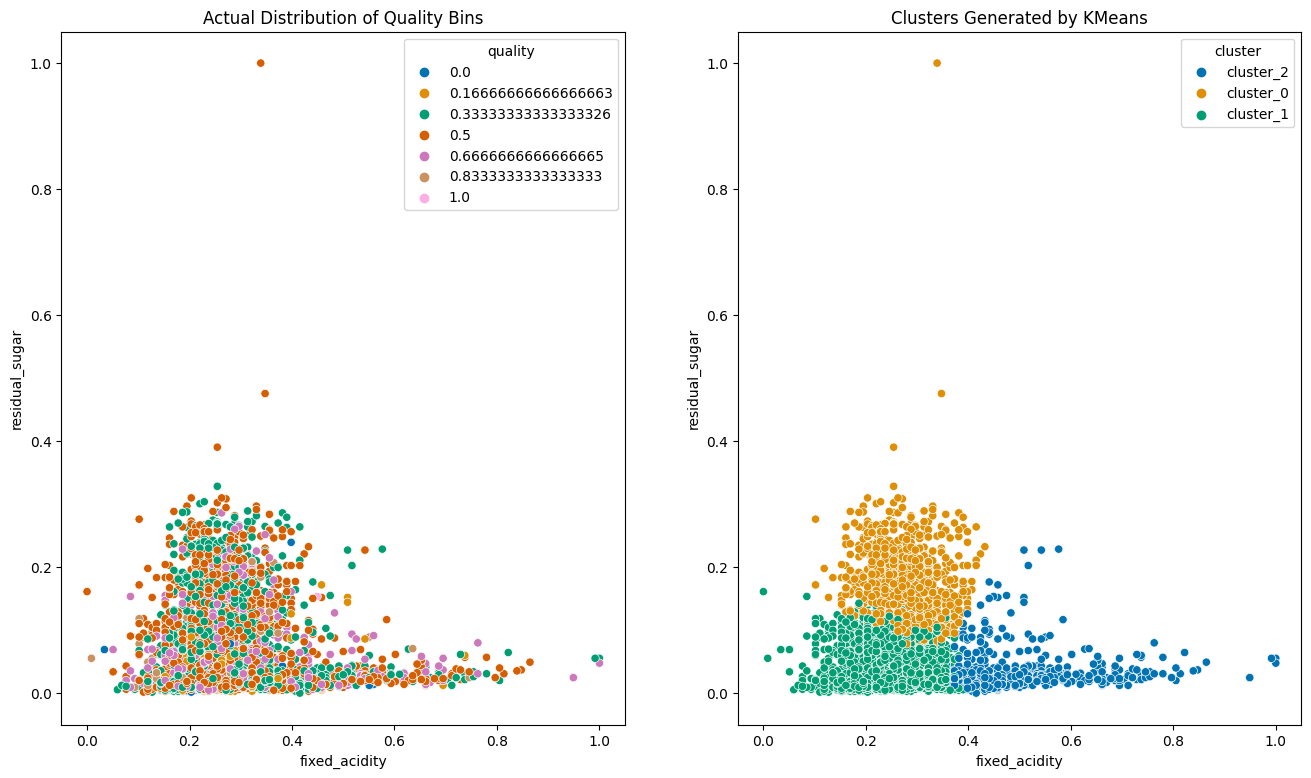

In [11]:
new_train1 = find_clusters(train_scaled, 'fixed_acidity', 'residual_sugar', 'density')


In [12]:
# Created dummy columns for 'cluster' column
cluster_dummies = pd.get_dummies(new_train1['cluster'], prefix='cluster', drop_first=True)

# Appended these dummy columns to the new_train1 dataframe
new_train1 = pd.concat([new_train1, cluster_dummies], axis=1)


In [13]:
new_train1.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio,cluster,cluster_cluster_1,cluster_cluster_2
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,...,0.438989,0.291341,0.020075,0.062414,0.035256,0.029406,0.230453,cluster_2,False,True
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,...,0.373711,0.149847,0.158298,0.105107,0.034612,0.036939,0.031590,cluster_0,False,False


In [14]:
train_scaled = new_train1.rename(columns={
    'cluster_cluster_1': 'composite_cluster_0',
    'cluster_cluster_2': 'composite_cluster_1'
})

In [15]:
train_scaled.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio,cluster,composite_cluster_0,composite_cluster_1
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,...,0.438989,0.291341,0.020075,0.062414,0.035256,0.029406,0.230453,cluster_2,False,True
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,...,0.373711,0.149847,0.158298,0.105107,0.034612,0.036939,0.031590,cluster_0,False,False


# Cluster 3: 'ph', 'density', 'chlorides'

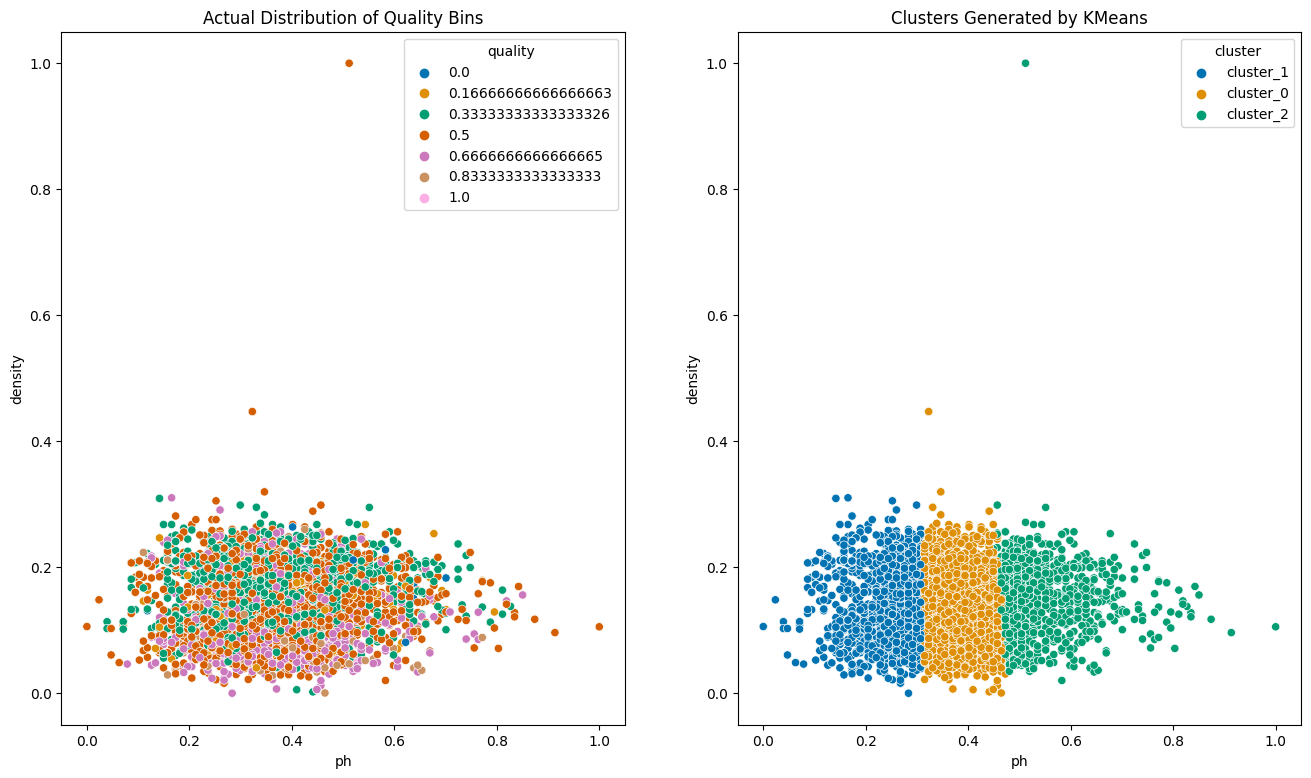

In [16]:
new_train2 = find_clusters(train_scaled, 'ph', 'density', 'chlorides')


In [17]:
# Create dummy columns for the 'cluster' column
cluster_dummies = pd.get_dummies(new_train2['cluster'], prefix='cluster', drop_first=True)

# Append these dummy columns to the new_train2 dataframe
new_train2 = pd.concat([new_train2, cluster_dummies], axis=1)


In [18]:
new_train2.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio,cluster,composite_cluster_0,composite_cluster_1,cluster_cluster_1,cluster_cluster_2
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,...,0.020075,0.062414,0.035256,0.029406,0.230453,cluster_1,False,True,True,False
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,...,0.158298,0.105107,0.034612,0.036939,0.031590,cluster_0,False,False,False,False


In [19]:
train_scaled = new_train1.rename(columns={
    'cluster_cluster_1': 'composite_cluster_2',
    'cluster_cluster_2': 'composite_cluster_3'
})

In [20]:
train_scaled.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio,cluster,composite_cluster_2,composite_cluster_3
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,...,0.438989,0.291341,0.020075,0.062414,0.035256,0.029406,0.230453,cluster_2,False,True
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,...,0.373711,0.149847,0.158298,0.105107,0.034612,0.036939,0.031590,cluster_0,False,False


# Cluster 3: 'residual_sugar', 'citric_acid', 'quality'

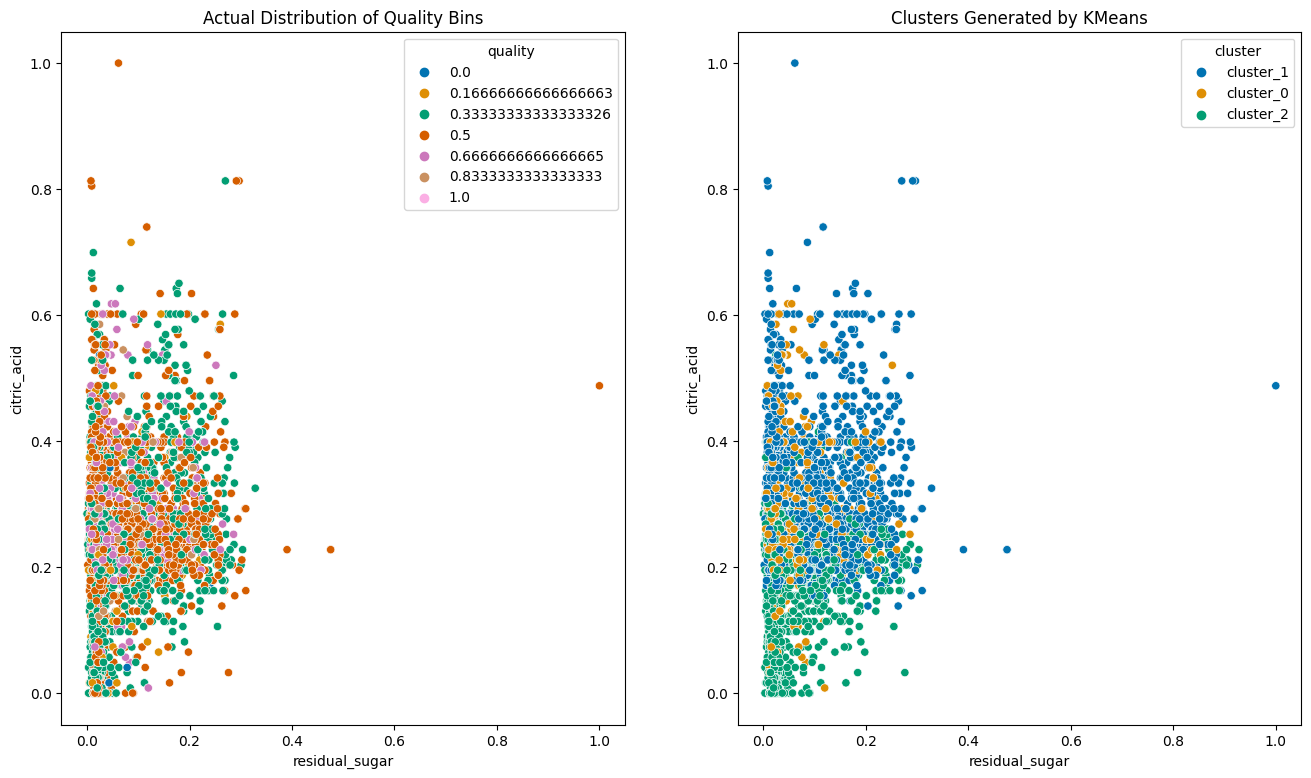

In [21]:
new_train3 = find_clusters(train_scaled, 'residual_sugar', 'citric_acid', 'quality')


In [22]:
# dummy columns for the 'cluster' column
cluster_dummies_3 = pd.get_dummies(new_train3['cluster'], prefix='cluster', drop_first=True)

# Appended these dummy columns to the new_train3 dataframe
new_train3 = pd.concat([new_train3, cluster_dummies_3], axis=1)


In [23]:
new_train3.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio,cluster,composite_cluster_2,composite_cluster_3,cluster_cluster_1,cluster_cluster_2
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,...,0.020075,0.062414,0.035256,0.029406,0.230453,cluster_1,False,True,True,False
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,...,0.158298,0.105107,0.034612,0.036939,0.031590,cluster_1,False,False,True,False


In [25]:
train_scaled = new_train3.rename(columns={
    'composite_cluster_2': 'composite_cluster_4',
    'composite_cluster_3': 'composite_cluster_5',
    'cluster_cluster_1': 'composite_cluster_6',
    'cluster_cluster_2': 'composite_cluster_7'
})

In [26]:
train_scaled.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio,cluster,composite_cluster_4,composite_cluster_5,composite_cluster_6,composite_cluster_7
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,...,0.020075,0.062414,0.035256,0.029406,0.230453,cluster_1,False,True,True,False
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,...,0.158298,0.105107,0.034612,0.036939,0.031590,cluster_1,False,False,True,False
